<a href="https://colab.research.google.com/github/aTunass/Cosine_similarity/blob/main/Cosin_similarity_and_HOG_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
from numpy.linalg import norm

def cos_sim(x, y):
    x = x.flatten()
    y = y.flatten()

    x = x.astype(np.float64)
    y = y.astype(np.float64)

    cos_sim = np.dot(x, y) / (norm(x)*norm(y))
    return cos_sim

In [ ]:
import cv2
import numpy as np
# Tạo mô hình VGG16
model = VGG16(weights='imagenet', include_top=False)
def extract_cnn_features(image):
    # Định dạng ảnh về kích thước phù hợp cho VGG16
    resized_image = cv2.resize(image, (224, 224))

    # Chuẩn bị ảnh cho mô hình VGG16
    preprocessed_image = preprocess_input(resized_image)

    # Trích xuất đặc trưng CNN
    features = model.predict(np.expand_dims(preprocessed_image, axis=0))

    return features.flatten()

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
def extract_hog_features(image):
    # Chuyển ảnh sang ảnh xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tạo đối tượng HOG
    hog = cv2.HOGDescriptor()

    # Trích xuất đặc trưng HOG
    features = hog.compute(gray)

    return features

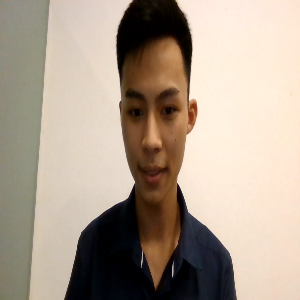

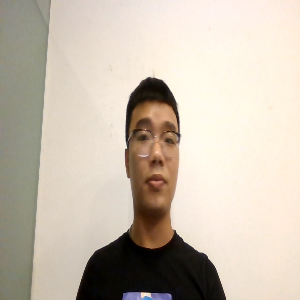

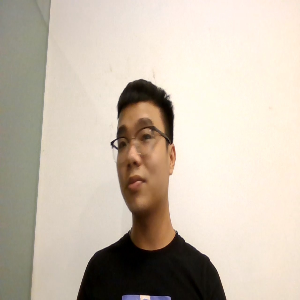

In [ ]:
# read a color image
from google.colab.patches import cv2_imshow
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/frame127.jpg')
img1 = cv2.resize(img1, (300, 300))

img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/frame79.jpg')
img2 = cv2.resize(img2, (300, 300))

img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/frame90.jpg')
img3 = cv2.resize(img3, (300, 300))

# show this image
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)

# cosine_similarity by image

In [ ]:
print(cos_sim(img1,img2))

0.9336552384496172


In [ ]:
print(cos_sim(img2,img3))

0.9901282465977208


# cosine_similarity by features

In [ ]:
cnn_features_1 = extract_cnn_features(img1)
cnn_features_2 = extract_cnn_features(img2)
print(cos_sim(cnn_features_1, cnn_features_2))

1/1 [==============================] - 1s 601ms/step
0.4990792124418347


In [ ]:
cnn_features_3 = extract_cnn_features(img3)
print(cos_sim(cnn_features_2, cnn_features_3))

1/1 [==============================] - 1s 1s/step
0.8229348597450533


In [ ]:
hog_features_1 = extract_hog_features(img1)
hog_features_2 = extract_hog_features(img2)
print(cos_sim(hog_features_1, hog_features_2))

0.7812986850304565


In [ ]:
hog_features_3 = extract_hog_features(img3)
print(cos_sim(hog_features_2, hog_features_3))

0.8401703604250609


# test

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_cnn_features(image):
    # Định dạng ảnh về kích thước phù hợp cho VGG16
    resized_image = cv2.resize(image, (224, 224))

    # Chuẩn bị ảnh cho mô hình VGG16
    preprocessed_image = preprocess_input(resized_image)

    # Tạo mô hình VGG16
    model = VGG16(weights='imagenet', include_top=False)

    # Trích xuất đặc trưng CNN
    features = model.predict(np.expand_dims(preprocessed_image, axis=0))

    return features.flatten()

# Đọc ảnh
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image/human1.jpg")
image = cv2.resize(image, (200, 200))

# Trích xuất đặc trưng CNN
cnn_features = extract_cnn_features(image)

print(cnn_features)


1/1 [==============================] - 1s 626ms/step
[ 0.         0.         0.        ...  0.        22.88486    1.0103806]


In [ ]:
import cv2
import numpy as np

def extract_hog_features(image):
    # Chuyển ảnh sang ảnh xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tạo đối tượng HOG
    hog = cv2.HOGDescriptor()

    # Trích xuất đặc trưng HOG
    features = hog.compute(gray)

    return features

# Đọc ảnh
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image/dog.jpeg")
image = cv2.resize(image, (200, 200))
# Trích xuất đặc trưng HOG
hog_features = extract_hog_features(image)

print(hog_features.shape)


(680400,)


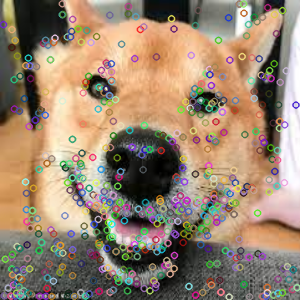

In [ ]:
import cv2

# Đọc ảnh
image_path = "/content/drive/MyDrive/Colab Notebooks/image/dog.jpeg"
image = cv2.imread(image_path)
image = cv2.resize(image, (300, 300))

# Chuyển đổi ảnh sang ảnh xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tạo đối tượng SIFT
sift = cv2.SIFT_create()

# Tìm các keypoints và descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Vẽ các keypoints trên ảnh gốc
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Hiển thị ảnh gốc với keypoints
cv2_imshow(image_with_keypoints)

